In [ ]:
Gradient Boosting Regression is a machine learning technique that is used for regression problems.
It is a type of ensemble method that combines the predictions of several weak models to create a
more accurate final prediction. The method works by iteratively adding new models to the ensemble,
each one trained to correct the errors of the previous models.
In Gradient Boosting Regression, each model is trained to minimize the residual errors of the previous 
model. Specifically, each new model is trained to predict the negative gradient of the loss
function with respect to the previous model's output, at each training example.
The output of each model is then added to the output of the previous models, weighted by a learning
rate parameter, to produce the final prediction.
Gradient Boosting Regression has been shown to be a highly effective technique for a wide range of 
regression problems, and is widely used in industry and academia. Some popular implementations of 
Gradient Boosting Regression include XGBoost, LightGBM, and scikit-learn's GradientBoostingRegressor.

## 2

In [32]:
import numpy as np
np.set_printoptions( suppress = True)
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [57]:
class BoostingRegressor:
    
    from sklearn.tree import DecisionTreeRegressor
    
    def __init__(self, learning_rate=0.1, n_estimators=100, max_depth=3):
        self.learning_rate = learning_rate
        self.n_estimators = n_estimators
        self.max_depth = max_depth
        self.models = []
        self.residuals = []
        
    def fit(self, X, y):
        
        self.F0 = y.mean()
        Fm = self.F0
        
        for i in range(self.n_estimators):
            r = y - Fm
            self.residuals.append(np.sum(r**2)/len(r))
            model = DecisionTreeRegressor(max_depth = self.max_depth)
            model.fit(X, r)
            gamma = model.predict(X).reshape(-1, 1)
            Fm += self.learning_rate * gamma
            self.models.append(model)
            
    def predict(self, X):
        Fm = self.F0
        for i in range(self.n_estimators):
            Fm += self.learning_rate * self.models[i].predict(X)    
        return Fm
    
    def plot_it(self):
        x_plot = list(range(self.n_estimators))
        plt.plot(x_plot, self.residuals)
        plt.ylabel('rms')
        plt.xlabel('iteration')
        plt.show()
        
    # added later to  try to make it compatible with gridsearchCV
    def score(self, X, y):
        y_pred = self.predict(X)
        return r2_score(y, y_pred)
    
    def get_params(self, deep=True):
        return {
            'learning_rate': self.learning_rate,
            'n_estimators': self.n_estimators,
            'max_depth': self.max_depth
        }

In [45]:
def MSE(y_pred , y_true):
    temp = int(len(y_pred)/2)
    error = np.subtract(y_pred[0:temp], y_true)
    sqrd_err = np.square(error)
    return sqrd_err.mean()

In [46]:
data = pd.read_excel('Boston_Housing.xlsx')
np_data = np.array(data)
X = np_data[:,0:-1]
y = np_data[:,-1]
y= y.reshape(-1,1)

In [47]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled_X=scaler.fit_transform(X)
scaled_y=scaler.fit_transform(y)
np.set_printoptions(suppress=True)

In [48]:
booster = BoostingRegressor(
    n_estimators=100, 
    learning_rate=0.1, 
    max_depth = None)
booster.fit(scaled_X,scaled_y)
Y_pred = booster.predict(scaled_X)
MSE(Y_pred, scaled_y)

0.07744125750228463

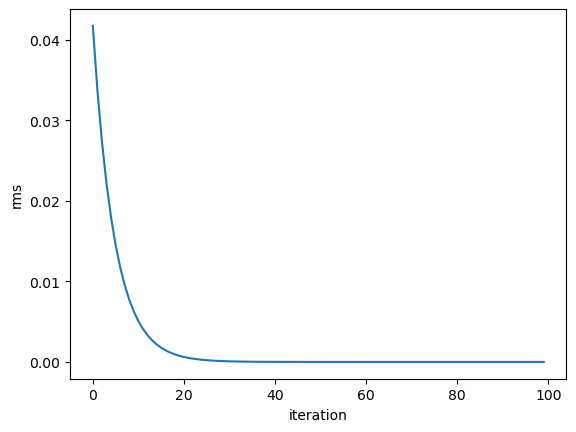

In [49]:
booster.plot_it()

## Q3

## seems like gridsearchCV needs various nitty gritty details to work on custom scratch made functions, 
## its not working on my scratch made class , i tried my best

In [58]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'learning_rate': [0.01, 0.1, 0.5],
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7]
}

grid_search = GridSearchCV(BoostingRegressor(), param_grid = param_grid, cv=5)

grid_search.fit(scaled_X,scaled_y)

print("Best hyperparameters: ", grid_search.best_params_)
print("Best mean squared error: ", grid_search.best_score_)


AttributeError: 'BoostingRegressor' object has no attribute 'set_params'

In [ ]:
Q4. In Gradient Boosting, a weak learner is a simple machine learning algorithm
that is only slightly better than random guessing. The idea behind using a weak learner is that 
by combining many of them, we can create a strong learner that is capable of making accurate
predictions. Common examples of weak learners include decision trees with a small depth or linear
regression models.

Q5. The intuition behind Gradient Boosting is to iteratively add weak learners to a model, 
with each new learner focusing on correcting the errors made by the previous ones. 
The algorithm starts by making a prediction using a simple model, such as a decision tree
with a small depth. It then calculates the error between the prediction and the actual value 
of the target variable. In the next step, a new weak learner is added to the model to correct
the errors made by the first learner. This process is repeated until a stopping criterion is met, 
or until the model achieves the desired level of accuracy.

Q6. The Gradient Boosting algorithm builds an ensemble of weak learners by iteratively adding 
them to the model in a process called boosting. At each iteration, the algorithm calculates the
residual error between the predicted values and the actual values of the target variable. 
The residual error is used as the target variable for the next iteration, and a new weak learner 
is added to the model to predict the residual error. The predictions from all the weak learners 
are then combined to make the final prediction.

## 7  , src:wikipedia

In [ ]:
# algo i used in implementing gradient boost code from scratch

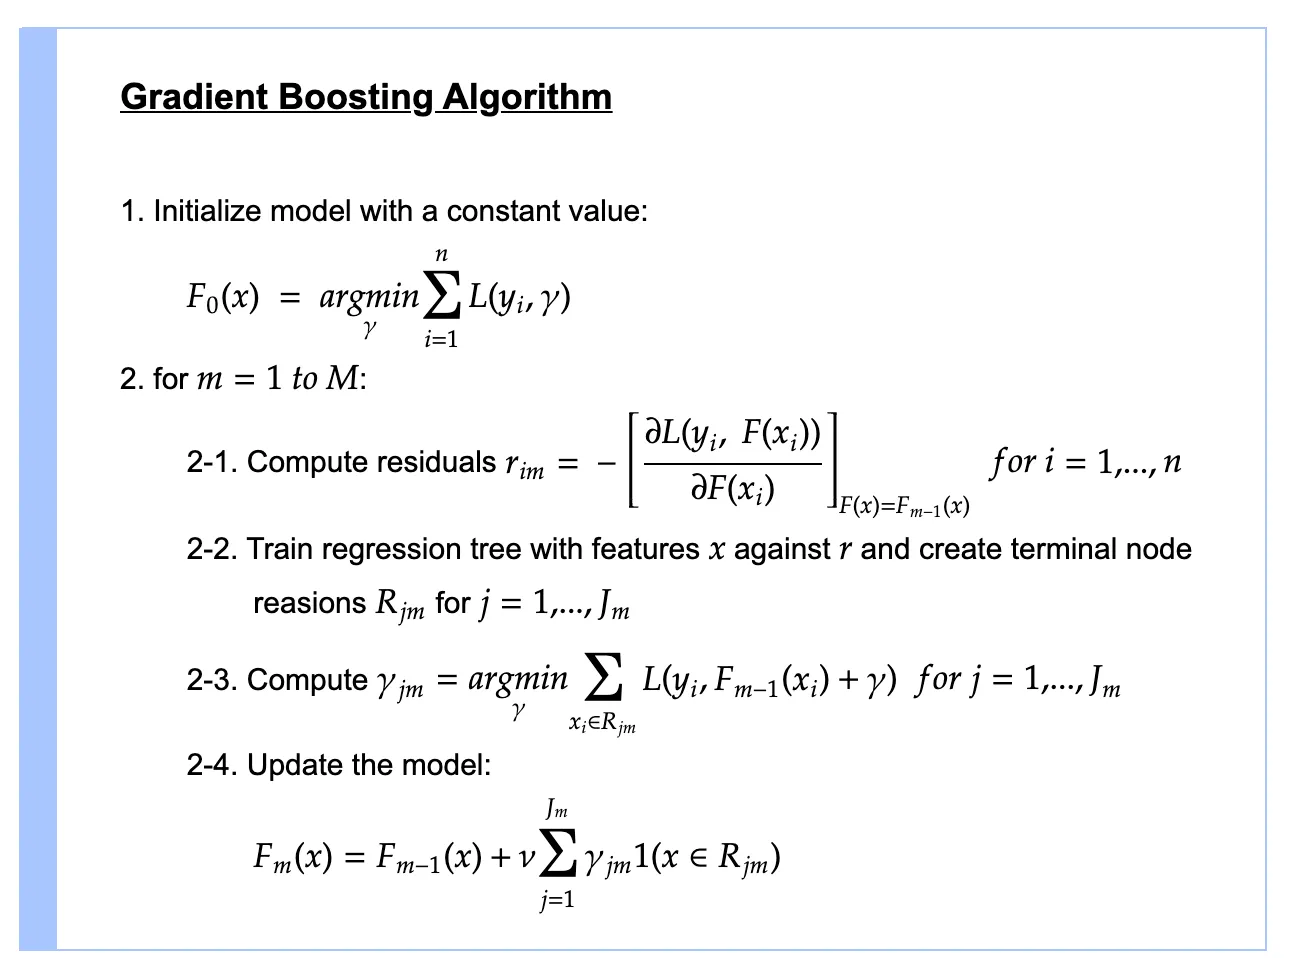